# Supervised Machine Learning Final Project

### By Chase Bugajski

## Introduction

For this assignment, I was tasked with finding and analyzing a dataset using supervised machine learning methods we learned in class. After looking through many different resources on kaggle, I chose a strictly numeric dataset of 16 quantitative attributes of 7 different types of dry beans. The goal is the build a model to predict bean type.

I'm breaking this up into three parts: data preparation and exploratory data analysis (EDA), model creation and testing, and conclusions. 

## Part 1: Data Preparation & EDA

In [70]:
import urllib.request
import zipfile
import pandas as pd
#You may have to uncomment the below line if the seaborn plots fail
#%pip install seaborn==0.11.0
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

First, I'm reading in the dataset. I hope the file path below still works for you, however if not, you can find more information here: https://archive.ics.uci.edu/ml/datasets/Dry+Bean+Dataset.

In [2]:
link = "https://www.muratkoklu.com/datasets/vtdhnd02.php" #
urllib.request.urlretrieve(link, "Dry_Bean_Dataset.zip")
compressed_file = zipfile.ZipFile('Dry_Bean_Dataset.zip')
input_excel = compressed_file.open('Dry_Bean_Dataset/Dry_Bean_Dataset.xlsx')
beans = pd.DataFrame(pd.read_excel(input_excel, sheet_name = 0))
beans.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [3]:
print(beans.info())
print('Number of columns with null values: ', beans.isna().any(axis=0).sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

We see that the dataset is completely clean with no null values! I didn't choose this data for that reason, but it doesn't hurt.

In [4]:
print(beans.describe())

                Area     Perimeter  MajorAxisLength  MinorAxisLength  \
count   13611.000000  13611.000000     13611.000000     13611.000000   
mean    53048.284549    855.283459       320.141867       202.270714   
std     29324.095717    214.289696        85.694186        44.970091   
min     20420.000000    524.736000       183.601165       122.512653   
25%     36328.000000    703.523500       253.303633       175.848170   
50%     44652.000000    794.941000       296.883367       192.431733   
75%     61332.000000    977.213000       376.495012       217.031741   
max    254616.000000   1985.370000       738.860153       460.198497   

       AspectRation  Eccentricity     ConvexArea  EquivDiameter        Extent  \
count  13611.000000  13611.000000   13611.000000   13611.000000  13611.000000   
mean       1.583242      0.750895   53768.200206     253.064220      0.749733   
std        0.246678      0.092002   29774.915817      59.177120      0.049086   
min        1.024868      0.

I'm no expert on beans so most of these don't mean anything to me. Let's dig deeper.

In [5]:
beans['Class'].value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

Finally, a problem: the classes are very imbalanced, with the largest class having almost 7x more representation than the smallest! I'll handle this shortly but first, let's see what kinds of visual differences there are between the beans across their attributes.

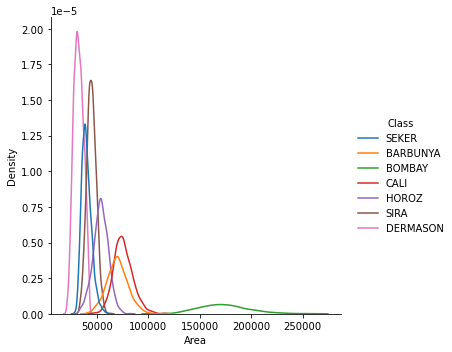

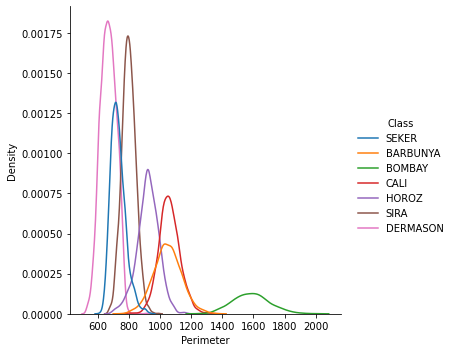

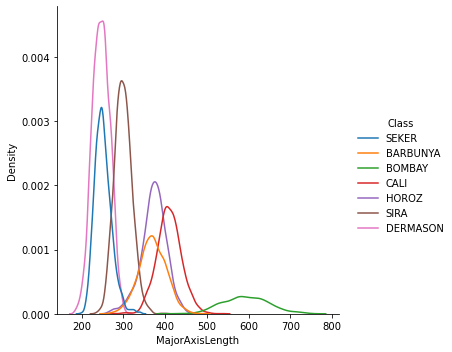

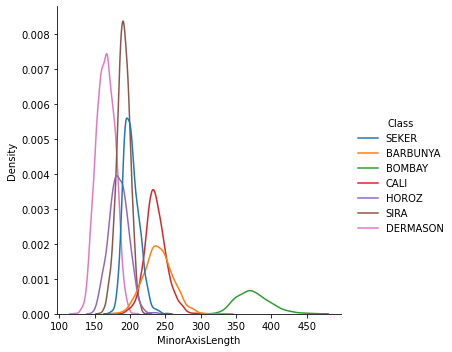

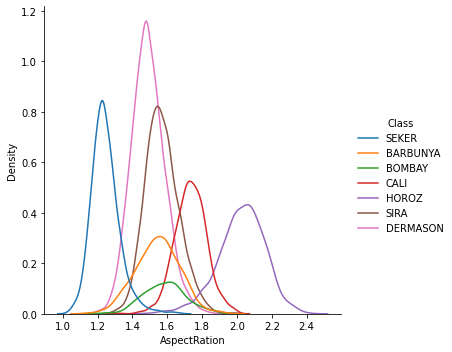

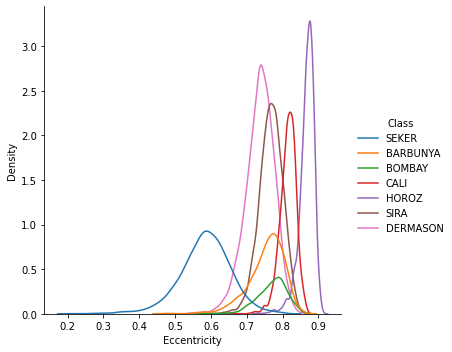

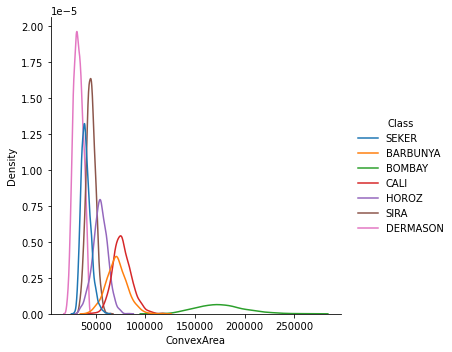

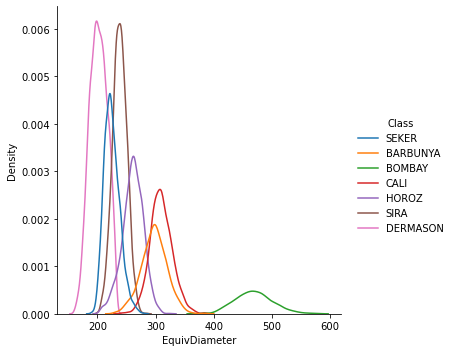

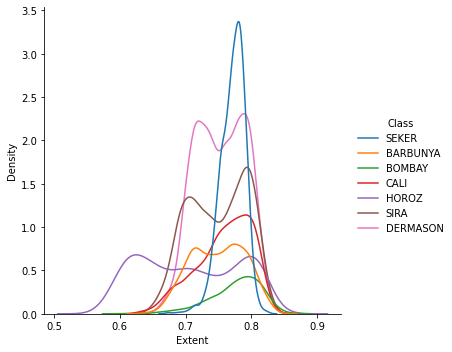

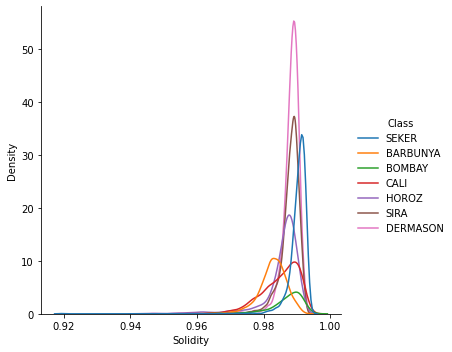

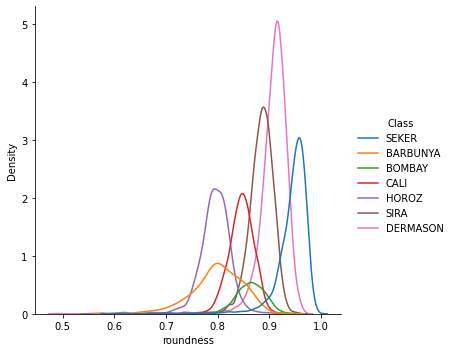

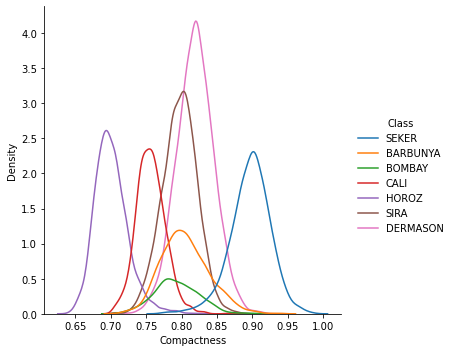

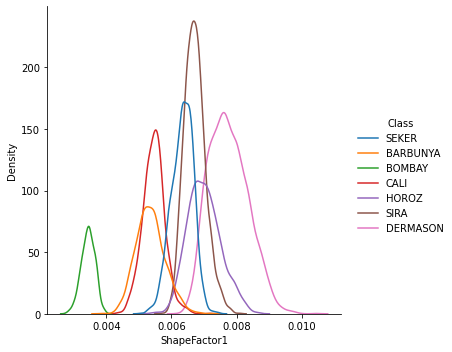

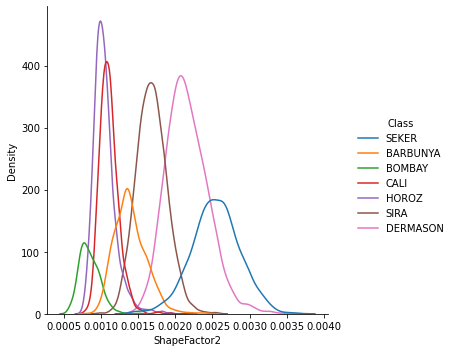

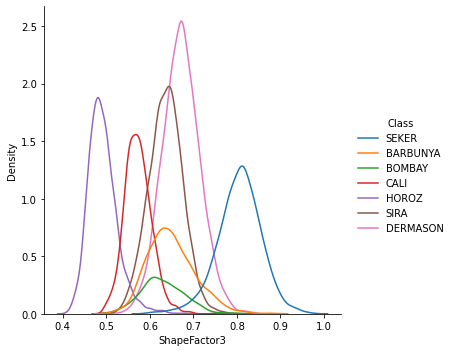

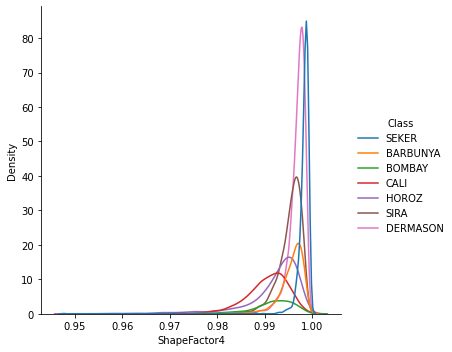

In [6]:
columns = list(beans.columns.values)[:-1]

for column in columns:
    print(sns.displot(data = beans, x = str(column), hue="Class", kind="kde"))

In viewing the distribution plots, I'm interested in seeing if any of the attributes distinguish bewteen all the beans. Note that most graphs show a normal distribution. Also, many of the attributes distinguish one or two beans. For instance, the first graph for Area clearly shows that Bombay beans have a greater area than all the rest.  However, most of the rest show most of the beans having roughly the same median.

A couple more things to note: Bombay seems to be largest bean, with a far greater Area, Perimeter, MajorAxisLength, MinorAxisLength, EquivDiameter, and ConvexArea; and the AspectRation, roundness, Compactness, and ShapeFactor1-3 have the widest variety of bean distributions, which may make them especially useful in the classification models. I'll investigate further in the analysis section.

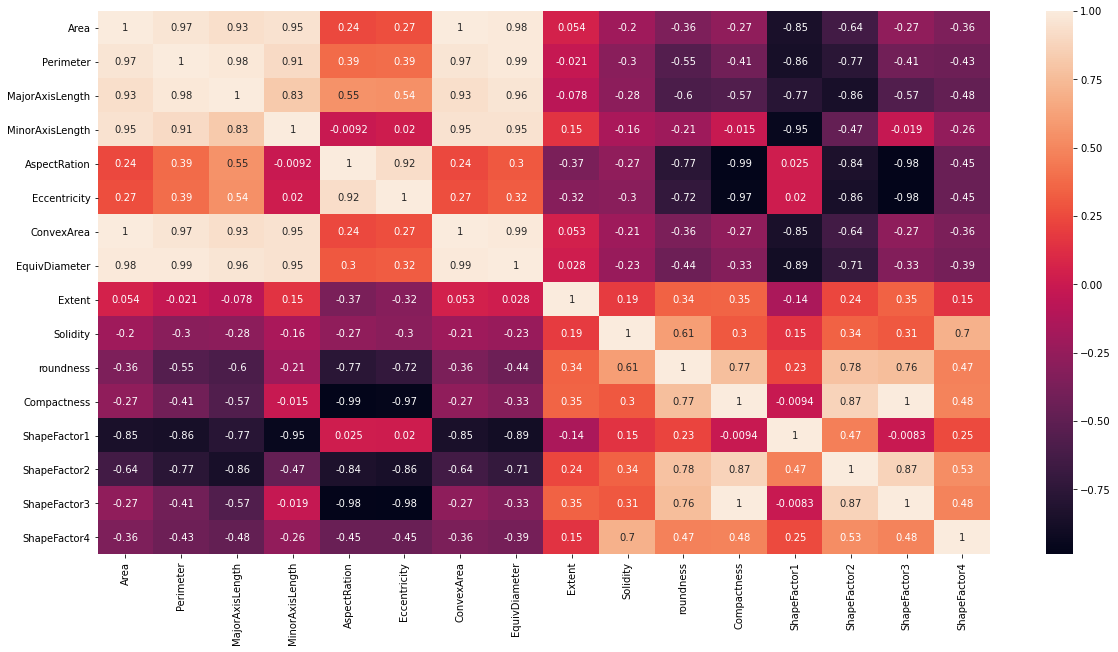

In [7]:
plt.subplots(figsize=(20,10))
sns.heatmap(beans.corr(), annot = True)

Here we see some high correlations between many sets of variables. There are even some which are perfectly correlated, such as ConvexArea-Area and Compactness-ShapeFactor3. This is to be expected since all of the features are different measurements of the beans; there are only so many ways to measure them.

In the next cell, I'm taking into account the class imbalance. I'm creating three datasets and will train my models on all three to demonstrate any differences: one dataset is the original, one upsamples the minority classes (3546 bootstrapped samples per bean), and one downsamples majority classes (522 samples per bean). Finally, I split these into training and test sets, with a 20% test size.

In [8]:
classes = beans['Class'].unique()

SEKER = beans[beans.Class==classes[0]]
BARBUNYA = beans[beans.Class==classes[1]]
BOMBAY = beans[beans.Class==classes[2]]
CALI = beans[beans.Class==classes[3]]
HOROZ = beans[beans.Class==classes[4]]
SIRA = beans[beans.Class==classes[5]]
DERMASON = beans[beans.Class==classes[6]]

#Upsampling minority class
SEKER_u = resample(SEKER, replace=True, n_samples=3546, random_state=34)
BARBUNYA_u = resample(BARBUNYA, replace=True, n_samples=3546, random_state=234)
BOMBAY_u = resample(BOMBAY, replace=True, n_samples=3546, random_state=567)
CALI_u = resample(CALI, replace=True, n_samples=3546, random_state=293)
HOROZ_u = resample(HOROZ, replace=True, n_samples=3546, random_state=123)
SIRA_u = resample(SIRA, replace=True, n_samples=3546, random_state=2)

beans_upsampled = pd.concat([DERMASON, SEKER_u, BARBUNYA_u, BOMBAY_u, CALI_u, HOROZ_u, SIRA_u])

#Downsampling majority class
SEKER_d = resample(SEKER, replace=False, n_samples=522, random_state=56)
BARBUNYA_d = resample(BARBUNYA, replace=False, n_samples=522, random_state=32)
DERMASON_d = resample(DERMASON, replace=False, n_samples=522, random_state=43)
CALI_d = resample(CALI, replace=False, n_samples=522, random_state=3456)
HOROZ_d = resample(HOROZ, replace=False, n_samples=522, random_state=876)
SIRA_d = resample(SIRA, replace=False, n_samples=522, random_state=102)

beans_downsampled = pd.concat([BOMBAY, DERMASON_d, SEKER_u, BARBUNYA_u, CALI_u, HOROZ_u, SIRA_u])

#Creating test/train datasets
y = beans['Class'].values
x = beans.drop('Class', axis=1).values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

y_u = beans_upsampled['Class'].values
x_u = beans_upsampled.drop('Class', axis=1).values
x_train_u, x_test_u, y_train_u, y_test_u = train_test_split(x_u, y_u, test_size=0.2)

y_d = beans_downsampled['Class'].values
x_d = beans_downsampled.drop('Class', axis=1).values
x_train_d, x_test_d, y_train_d, y_test_d = train_test_split(x_d, y_d, test_size=0.2)

datasets = [['Original: ', x_train, x_test, y_train, y_test], 
            ['Upsampled: ', x_train_u, x_test_u, y_train_u, y_test_u], 
            ['Downsampled: ', x_train_d, x_test_d, y_train_d, y_test_d]]

## Part 2: Model Creation and Testing

I will now use three of the classification methods from class and see which one is best. First will be KNN,second will be Random Forest, and third will be AdaBoost.

In [9]:
KNN = KNeighborsClassifier()
param_to_try = {"n_neighbors" : [i for i in range(1, 6)]}
grid = GridSearchCV(estimator = KNN, param_grid = param_to_try)

means = []
for dataset in datasets:
    grid.fit(dataset[1], dataset[3])
    print(dataset[0], '\n', 'Best KNN: ', grid.best_params_ , 'Accuracy: ', grid.best_score_)
    means.append(list(grid.cv_results_['mean_test_score']))

Original:  
 Best KNN:  {'n_neighbors': 1} Accuracy:  0.7232726479730279
Upsampled:  
 Best KNN:  {'n_neighbors': 1} Accuracy:  0.9090996710034963
Downsampled:  
 Best KNN:  {'n_neighbors': 1} Accuracy:  0.9050534906726652


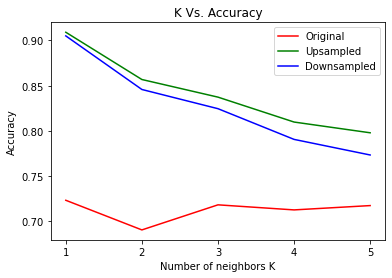

In [10]:
knns = list(range(1, 6))

plt.plot(knns, means[0], 'red', label = 'Original')
plt.plot(knns, means[1], 'green', label = 'Upsampled')
plt.plot(knns, means[2], 'blue', label = 'Downsampled')
plt.locator_params(axis="x", integer=True, tight=True)
plt.xlabel("Number of neighbors K")
plt.ylabel("Accuracy")
plt.title("K Vs. Accuracy")
plt.legend()
plt.show()

Note that the K for the most accurate model is always 1 neighbor. This makes sense considering that high K tends to produce better results for models with a ton of features; we only have 16.

Original: 
None
0.7341167829599706
              precision    recall  f1-score   support

    BARBUNYA       0.53      0.53      0.53       259
      BOMBAY       1.00      1.00      1.00        84
        CALI       0.61      0.61      0.61       299
    DERMASON       0.84      0.85      0.84       723
       HOROZ       0.76      0.74      0.75       390
       SEKER       0.78      0.70      0.74       414
        SIRA       0.67      0.73      0.70       554

    accuracy                           0.73      2723
   macro avg       0.74      0.74      0.74      2723
weighted avg       0.74      0.73      0.73      2723

Upsampled: 
None
0.9335347432024169
              precision    recall  f1-score   support

    BARBUNYA       0.92      0.95      0.94       718
      BOMBAY       1.00      1.00      1.00       732
        CALI       0.95      0.93      0.94       742
    DERMASON       0.92      0.87      0.89       699
       HOROZ       0.95      0.94      0.95       686
       

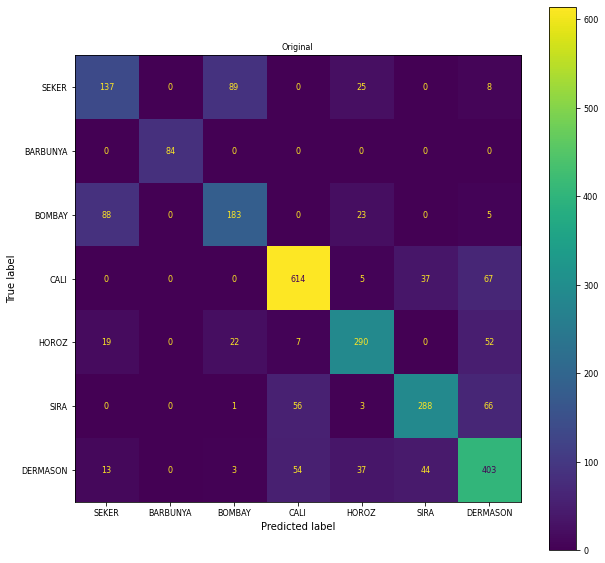

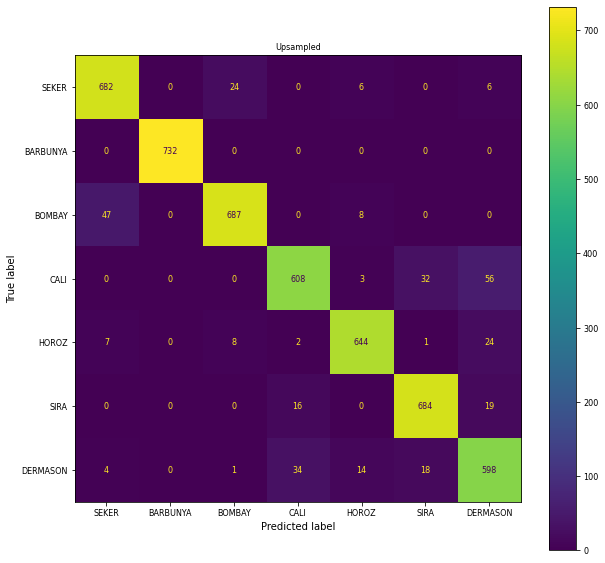

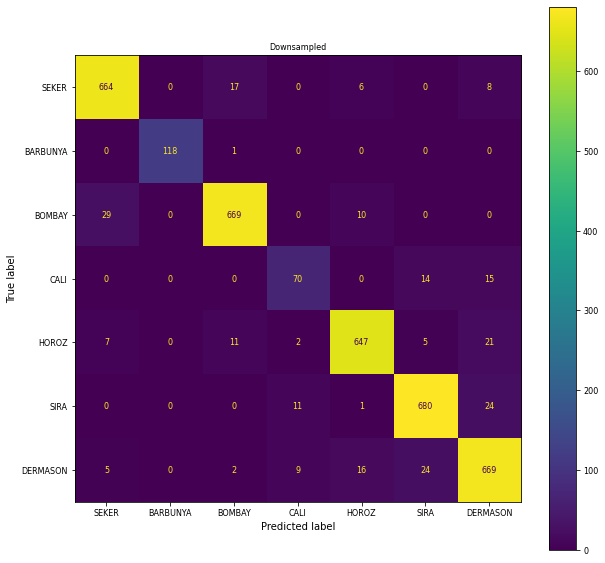

In [71]:
def confusion(dataset, yhat):
    cm = confusion_matrix(y_true = dataset[4], y_pred = yhat)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = classes)
    fig, ax = plt.subplots(figsize=(10,10))
    disp.plot(ax=ax, values_format='')
    size = len(dataset[0])
    ax.set(title = str(dataset[0])[:size - 2])
    
for dataset in datasets:
    KNN_1 = KNeighborsClassifier(n_neighbors = 1)
    KNN_best = KNN_1.fit(dataset[1], dataset[3])
    yhat = KNN_best.predict(dataset[2])
    print(dataset[0])
    print(confusion(dataset, yhat))
    print(accuracy_score(y_true = dataset[4], y_pred = yhat))
    print(classification_report(y_true = dataset[4], y_pred = yhat))
          

<b>Observations</b>: The unweighted dataset predictably had much worse accuracy. Comparing the upsampled to downsamples datasets, we see that both models classified the Bombay bean very well, which makes sense in the context of the earlier observations about Bombay being the largest bean. The upsampled dataset performed marginally better overall with an average precision of 93 vs 91, which makes sense considering the downsampled dataset's low Dermason classification precision; it actually performed worse than the unweighted dataset! However, overall accuracy between the two was practically identical (<0.01 difference).

Reviewing the confusion matrices of the upsampled and downsampled datasets, we see that both models misclassified Seker and Bombay with each other most often. The bean most misclassified as another is Cali being classified as Dermason in the downsampled dataset.

Overall, KNN is not bad but I think we can do better.

Original: 
              precision    recall  f1-score   support

    BARBUNYA       0.93      0.90      0.92       259
      BOMBAY       1.00      1.00      1.00        84
        CALI       0.92      0.92      0.92       299
    DERMASON       0.92      0.93      0.93       723
       HOROZ       0.95      0.95      0.95       390
       SEKER       0.94      0.95      0.95       414
        SIRA       0.88      0.87      0.88       554

    accuracy                           0.92      2723
   macro avg       0.93      0.93      0.93      2723
weighted avg       0.92      0.92      0.92      2723

0.9236136614028645
None
Upsampled: 
              precision    recall  f1-score   support

    BARBUNYA       0.99      0.99      0.99       718
      BOMBAY       1.00      1.00      1.00       732
        CALI       0.99      0.99      0.99       742
    DERMASON       0.96      0.92      0.94       699
       HOROZ       0.99      0.99      0.99       686
       SEKER       0.98      0.

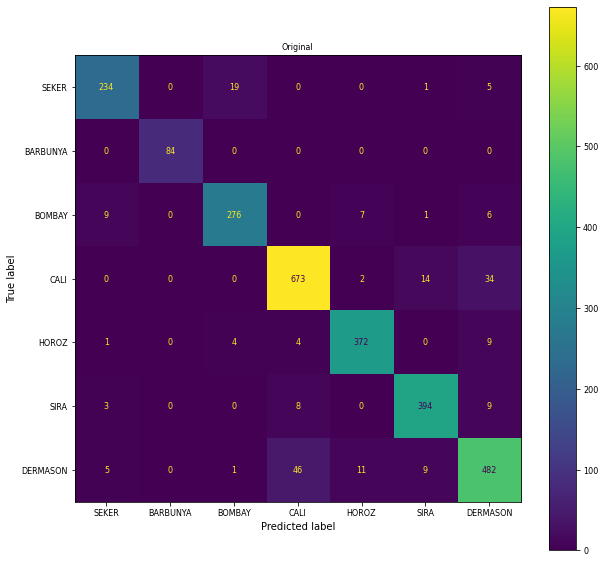

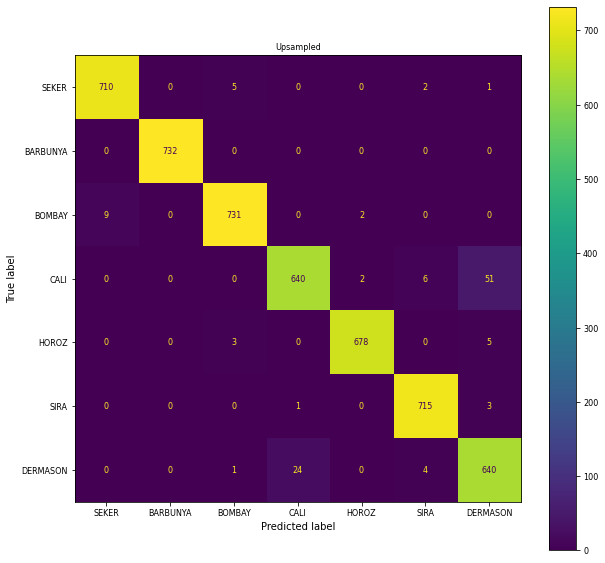

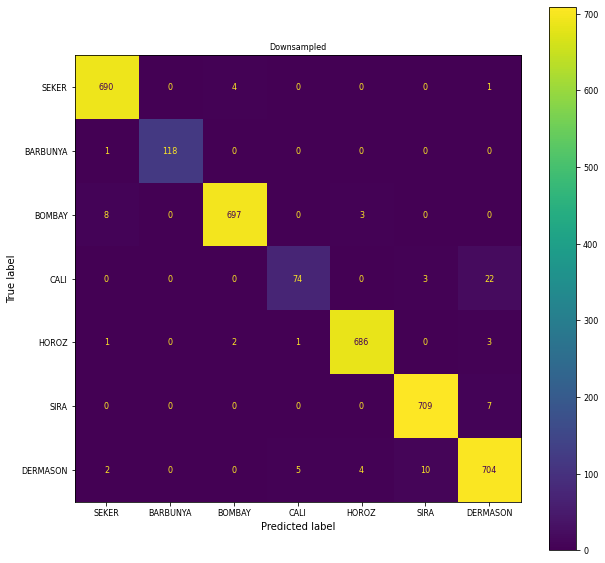

In [73]:
forest_importances = []
for dataset in datasets: 
    forest = RandomForestClassifier(random_state=0)
    forest.fit(dataset[1], dataset[3])
    yhat = forest.predict(dataset[2])
    print(dataset[0])
    forest_importances.append(list(forest.feature_importances_))
    print(classification_report(y_true = dataset[4], y_pred = yhat))
    print(accuracy_score(y_true = dataset[4], y_pred = yhat))
    print(confusion(dataset, yhat))
    

<module 'matplotlib.pyplot' from '/Users/BenBugajski/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

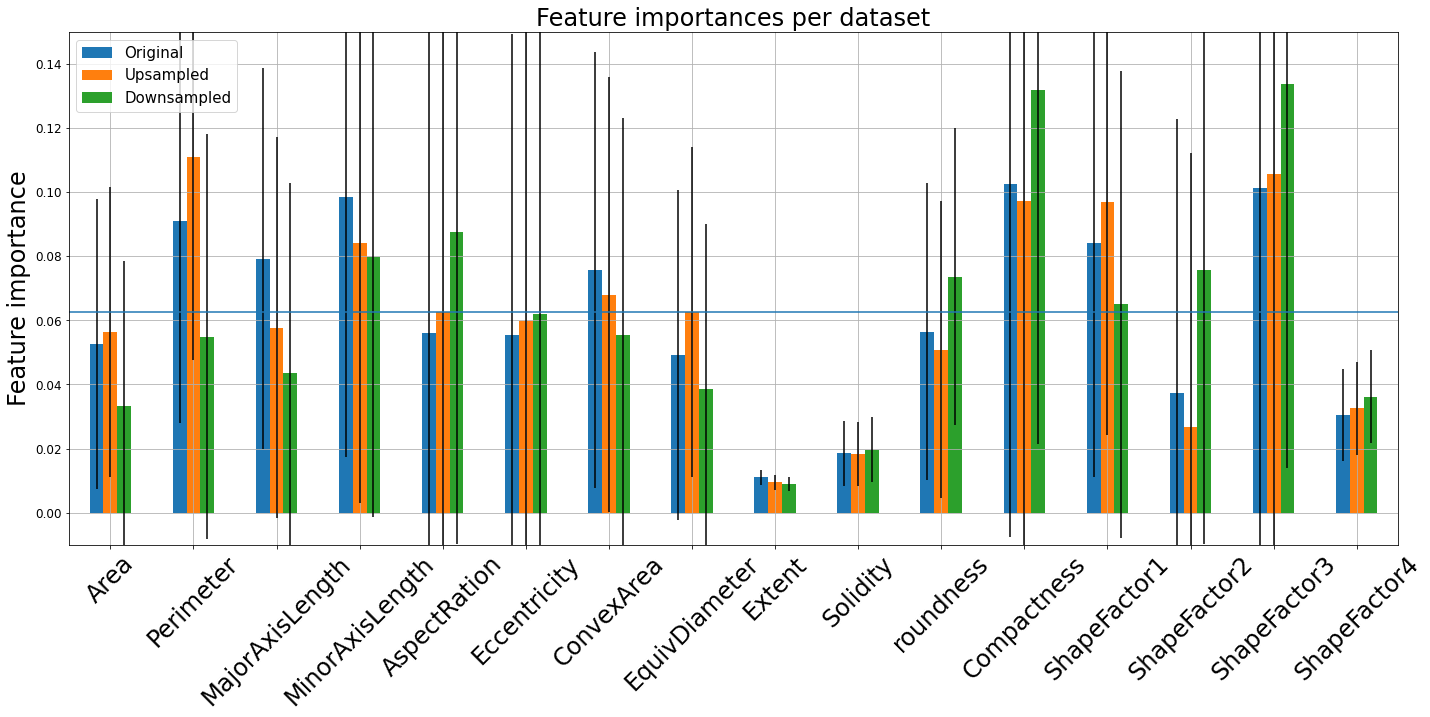

In [66]:
def importance_chart(importances, ylimhigh):
    idx = 0
    for importance in importances:
        if idx == 0:
            original_important = pd.Series(importance, index=list(beans.columns.values)[:-1])
            original_sd = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
        elif idx == 1:
            upsampled_important = pd.Series(importance, index=list(beans.columns.values)[:-1])
            upsampled_sd = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
        else:
            downsampled_important = pd.Series(importance, index=list(beans.columns.values)[:-1])
            downsampled_sd = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
        idx += 1

    features = list(beans.columns.values)[:-1]

    importances = pd.DataFrame({'Original': original_important, 
                               'Upsampled': upsampled_important, 
                               'Downsampled': downsampled_important}, index=features)
    fig, ax = plt.subplots(figsize=(20,10))

    importances.plot.bar(yerr=std, ax=ax)
    ax.set_title("Feature importances per dataset", fontsize = 24)
    ax.set_ylabel("Feature importance", fontsize = 24)
    ax.tick_params(axis='x', labelsize=24)
    ax.tick_params(axis='y', labelsize=12)
    plt.grid()
    plt.legend(fontsize=15)
    plt.xticks(rotation=45)
    plt.axhline(0.0625)
    ax.set_ylim([-0.01, ylimhigh])
    fig.tight_layout()
    
    return plt

importance_chart(forest_importances, 0.15)

<b>Observations</b>: Once again, our model worked best on our resampled datasets, though it performed much better on our unweighted dataset than the KNN. All models also had perfect precision when classifying Bombay beans and our downsampled dataset again had poor performance when classifying Dermason. The upsampled dataset again seems to be better. Reviewing the confusion matrices, Cali was misclassified as Dermason most often again, however it was misclassified less often. The difference in accuracy was again <0.01.

Comparing feature importances across our models, we see that they vary widely. Also generally, the higher the importance, the higher is that importance's standard deviation and vice-versa. Looking at the distribution graphs, I had predicted that AspectRation, roundness, Compactness, and ShapeFactor1-3 would help differentiate the beans. Everything above the blue line has importance greater than would be expected by pure change (16 features / 100 = 6.25%). With this as the bar, we see that my predictions hold only for the downsampled dataset and that MinorAxisLength was also a significant feature within the model. 

Original: 
              precision    recall  f1-score   support

    BARBUNYA       0.93      0.90      0.92       259
      BOMBAY       1.00      1.00      1.00        84
        CALI       0.92      0.92      0.92       299
    DERMASON       0.92      0.93      0.93       723
       HOROZ       0.95      0.95      0.95       390
       SEKER       0.94      0.95      0.95       414
        SIRA       0.88      0.87      0.88       554

    accuracy                           0.92      2723
   macro avg       0.93      0.93      0.93      2723
weighted avg       0.92      0.92      0.92      2723

0.9236136614028645
None
Upsampled: 
              precision    recall  f1-score   support

    BARBUNYA       0.98      0.97      0.98       718
      BOMBAY       1.00      1.00      1.00       732
        CALI       0.97      0.97      0.97       742
    DERMASON       0.97      0.99      0.98       699
       HOROZ       0.99      0.99      0.99       686
       SEKER       0.99      0.

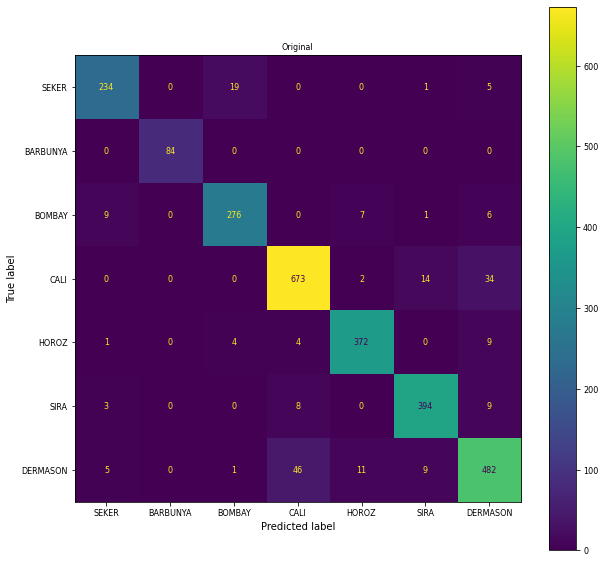

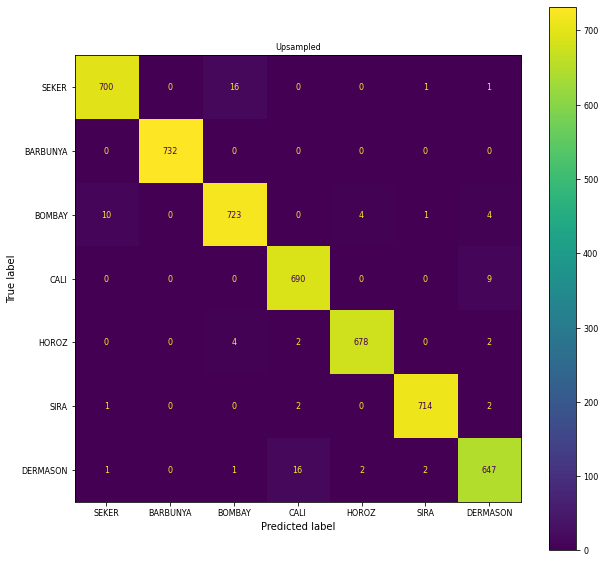

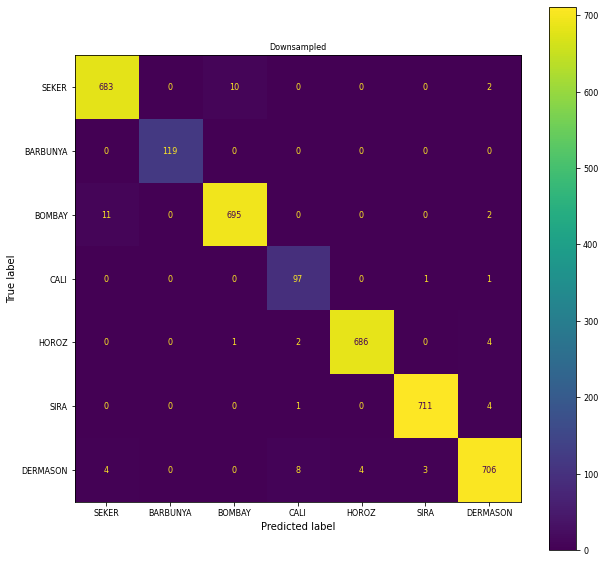

In [72]:
boost_importances = []
for dataset in datasets: 
    boost = AdaBoostClassifier(random_state=0)
    boost.fit(dataset[1], dataset[3])
    boost_importances.append(boost.feature_importances_)
    yhat = forest.predict(dataset[2])
    print(dataset[0])
    print(classification_report(y_true = dataset[4], y_pred = yhat))
    print(accuracy_score(y_true = dataset[4], y_pred = yhat))
    print(confusion(dataset, yhat))

<module 'matplotlib.pyplot' from '/Users/BenBugajski/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

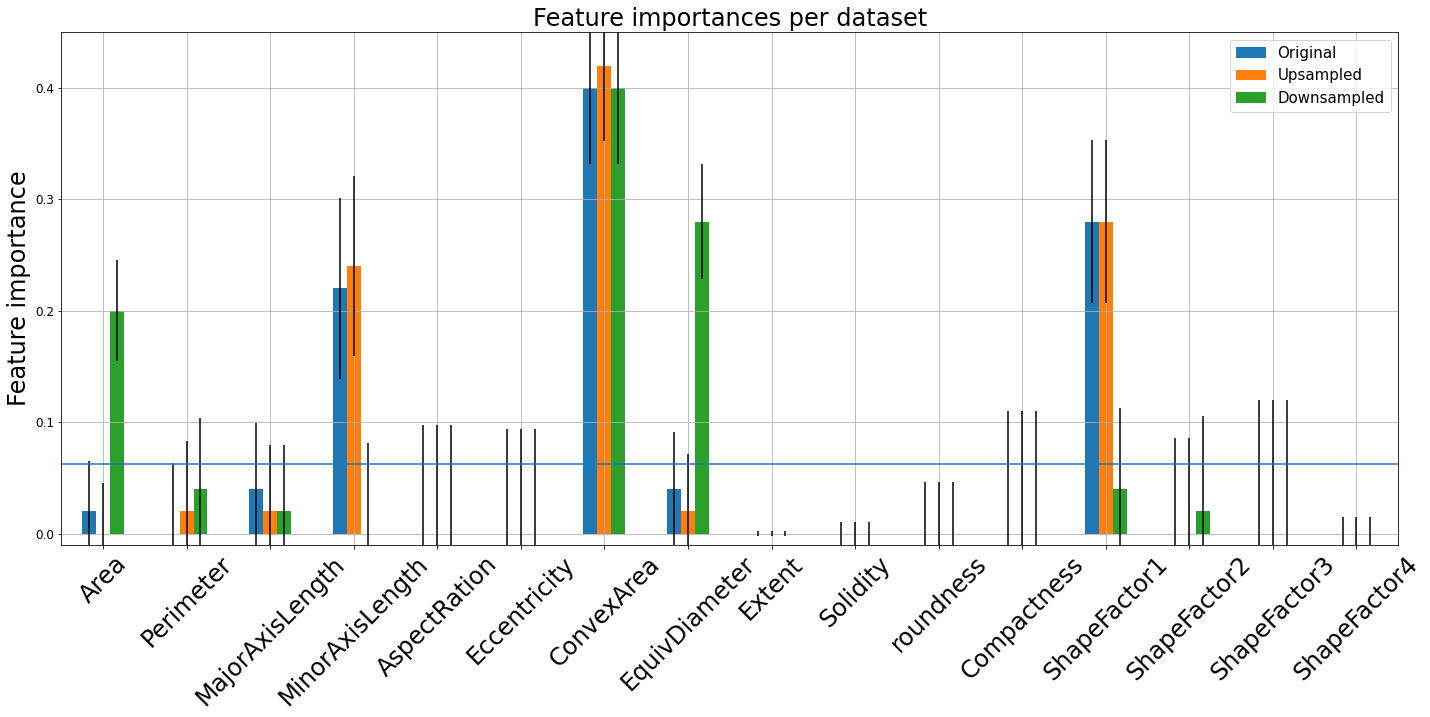

In [67]:
importance_chart(boost_importances, 0.45)

<b>Observations</b>: Adaboost performs best of all algorithms on the unweighted dataset and performs better than KNN on all three datasets. The downsampled Dermason precision is again low, however upsampled Dermason recall is lowest among all three models' upsampled recalls. This indicates that Adaboost is incorrectly labeling Dermason as not Dermason. Reviewing the confusion matrices, we see that Cali is being misclassified as Dermason very frequently (almost 1/4 of the time). Our model again performs best on the upsampled dataset. The difference in accuracy between the upsampled and downsampled datasets was again <0.01.

Looking at the feature importances, we see that only ShapeFactor1 of my original predictions held for only the original and updsampled datasets. Note as well that these importances have much starker differences, with only 3 features in each dataset which had sway in the final model.

## Part 3: Conclusion

In conclusion, AdaBoost and RandomForest classification algorithms produced the best models on the upsampled dataset, with an F1 score of 0.98. The RandomForest had better precision, however AdaBoost had almost perfect recall across the board, leaving choice of which model up to each individual's use of the data (RandomForest if you want to make sure the bean type you predict is truly the bean you get even if you miss out on some, and AdaBoost if you're okay with being more liberal and getting the wrong bean as long as none of the bean type you want slips through the cracks). Also, RandomForest and AdaBoost models produced very distinct feature importances, with AdaBoost preferencing just a few features and RandomForest showing some preference to all. It's also worth noting that precision and recall for the Bombay bean was >=0.99 for both models' up- and downsampled datasets. This is not surprising seeing how it has very distinct features across several features in the distribution plots. Future modeling should try to classify the smaller beans, perhaps by getting rid of Bombay in the dataset.

<u>Requested citation</u>: KOKLU, M. and OZKAN, I.A., (2020), "Multiclass Classification of Dry Beans Using Computer Vision and Machine Learning Techniques." Computers and Electronics in Agriculture, 174, 105507. 